<a href="https://colab.research.google.com/github/patrasaisujal555/ML_Lab_Test/blob/main/ML_Lab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
with open('/content/Question (2).md', 'r') as file:
    problem_statement = file.read()
print(problem_statement)

## Problem Statement

You are a data scientist at "FinSecure," a peer-to-peer lending company that connects borrowers with investors. The company's success hinges on its ability to accurately assess the risk of a borrower defaulting on their loan. A high rate of loan defaults not only results in financial losses for investors but also damages the company's reputation and trust in the marketplace.

The loan approval team currently relies on a manual, scorecard-based system to approve or deny loan applications. However, this process is slow and may not be capturing complex, non-linear patterns in the data that could indicate a higher risk of default. The leadership team wants to develop a data-driven system to predict the likelihood of a loan being paid back in full.

Your task is to analyze the provided loan application dataset and build a predictive model to identify loans that are likely to default. You are free to choose any architecture you have learned in class.


## The Dataset

Y

In [12]:
import pandas as pd

df = pd.read_csv('/content/loan_data (1).csv')

print("First 5 rows of the DataFrame:")
print(df.head())
print("\n" + "-"*50 + "\n")

print("DataFrame Info (data types and non-null values):")
df.info()
print("\n" + "-"*50 + "\n")

print("Descriptive statistics for numerical columns:")
print(df.describe())
print("\n" + "-"*50 + "\n")

print("Missing values per column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
   id  annual_income  debt_to_income_ratio  credit_score  loan_amount  \
0   0       29367.99                 0.084           736      2528.42   
1   1       22108.02                 0.166           636      4593.10   
2   2       49566.20                 0.097           694     17005.15   
3   3       46858.25                 0.065           533      4682.48   
4   4       25496.70                 0.053           665     12184.43   

   interest_rate  gender marital_status education_level employment_status  \
0          13.67  Female         Single     High School     Self-employed   
1          12.92    Male        Married        Master's          Employed   
2           9.76    Male         Single     High School          Employed   
3          16.10  Female         Single     High School          Employed   
4          10.21    Male        Married     High School          Employed   

         loan_purpose grade_subgrade  loan_paid_back  
0           

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['id', 'loan_paid_back'])
y = df['loan_paid_back']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train:\n", X_train.head())

Shape of X_train: (214491, 11)
Shape of X_test: (53623, 11)
Shape of y_train: (214491,)
Shape of y_test: (53623,)

First 5 rows of X_train:
         annual_income  debt_to_income_ratio  credit_score  loan_amount  \
228143       51345.02                 0.182           711      2415.41   
214995       92640.92                 0.263           645     17710.85   
165554       67553.59                 0.120           615      9441.04   
146752       48352.30                 0.171           673     10673.15   
55579        58941.17                 0.107           753     12772.36   

        interest_rate  gender marital_status education_level  \
228143          11.43    Male        Married     High School   
214995          12.52    Male         Single      Bachelor's   
165554          11.73  Female         Single     High School   
146752          12.83    Male         Single      Bachelor's   
55579           10.04  Female        Married        Master's   

       employment_status     

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

nominal_categorical_cols = ['gender', 'marital_status', 'employment_status', 'loan_purpose']

ordinal_categorical_cols = ['education_level', 'grade_subgrade']

education_categories = ['High School', 'Associate\'s', 'Bachelor\'s', 'Master\'s', 'Doctorate', 'Other', 'PhD']

grade_categories = ['A1', 'A2', 'A3', 'A4', 'A5',
                    'B1', 'B2', 'B3', 'B4', 'B5',
                    'C1', 'C2', 'C3', 'C4', 'C5',
                    'D1', 'D2', 'D3', 'D4', 'D5',
                    'E1', 'E2', 'E3', 'E4', 'E5',
                    'F1', 'F2', 'F3', 'F4', 'F5',
                    'G1', 'G2', 'G3', 'G4', 'G5']

ordinal_categories = [education_categories, grade_categories]

numerical_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

print("Nominal Categorical Columns:", nominal_categorical_cols)
print("Ordinal Categorical Columns:", ordinal_categorical_cols)
print("Education Level Order:", education_categories)
print("Grade Subgrade Order:", grade_categories)
print("Numerical Columns:", numerical_cols)

Nominal Categorical Columns: ['gender', 'marital_status', 'employment_status', 'loan_purpose']
Ordinal Categorical Columns: ['education_level', 'grade_subgrade']
Education Level Order: ['High School', "Associate's", "Bachelor's", "Master's", 'Doctorate', 'Other', 'PhD']
Grade Subgrade Order: ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
Numerical Columns: ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

df = pd.read_csv('/content/loan_data (1).csv') # Added this line to ensure df is defined

X = df.drop(columns=['id', 'loan_paid_back'])
y = df['loan_paid_back']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nominal_categorical_cols = ['gender', 'marital_status', 'employment_status', 'loan_purpose']
ordinal_categorical_cols = ['education_level', 'grade_subgrade']
education_categories = ['High School', 'Associate\'s', 'Bachelor\'s', 'Master\'s', 'Doctorate', 'Other', 'PhD']
grade_categories = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
ordinal_categories = [education_categories, grade_categories]
numerical_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), nominal_categorical_cols),
        ('cat_ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_categorical_cols)
    ])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train_processed, y_train)

education_levels = X_test['education_level'].unique()

auc_by_education = {}

for level in education_levels:
    subgroup_indices = X_test[X_test['education_level'] == level].index
    X_subgroup = X_test.loc[subgroup_indices]
    y_subgroup = y_test.loc[subgroup_indices]

    X_subgroup_processed = preprocessor.transform(X_subgroup)

    y_pred_proba_subgroup = logistic_model.predict_proba(X_subgroup_processed)[:, 1]

    if len(y_subgroup.unique()) > 1:
        auc = roc_auc_score(y_subgroup, y_pred_proba_subgroup)
        auc_by_education[level] = auc
    else:
        auc_by_education[level] = None

print("AUC Scores by Education Level:")
for level, auc_score in auc_by_education.items():
    if auc_score is not None:
        print(f"  {level}: {auc_score:.4f}")
    else:
        print(f"  {level}: Not enough classes to compute AUC")

AUC Scores by Education Level:
  Bachelor's: 0.9122
  Master's: 0.9082
  High School: 0.9092
  PhD: 0.9066
  Other: 0.9239


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

df = pd.read_csv('/content/loan_data (1).csv')

X = df.drop(columns=['id', 'loan_paid_back'])
y = df['loan_paid_back']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nominal_categorical_cols = ['gender', 'marital_status', 'employment_status', 'loan_purpose']
ordinal_categorical_cols = ['education_level', 'grade_subgrade']
education_categories = ['High School', 'Associate\'s', 'Bachelor\'s', 'Master\'s', 'Doctorate', 'Other', 'PhD']
grade_categories = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']
ordinal_categories = [education_categories, grade_categories]
numerical_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), nominal_categorical_cols),
        ('cat_ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_categorical_cols)
    ])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train_processed, y_train)

loan_purposes = X_test['loan_purpose'].unique()

auc_by_loan_purpose = {}

for purpose in loan_purposes:
    subgroup_indices = X_test[X_test['loan_purpose'] == purpose].index
    X_subgroup = X_test.loc[subgroup_indices]
    y_subgroup = y_test.loc[subgroup_indices]

    X_subgroup_processed = preprocessor.transform(X_subgroup)

    y_pred_proba_subgroup = logistic_model.predict_proba(X_subgroup_processed)[:, 1]

    if len(y_subgroup.unique()) > 1:
        auc = roc_auc_score(y_subgroup, y_pred_proba_subgroup)
        auc_by_loan_purpose[purpose] = auc
    else:
        auc_by_loan_purpose[purpose] = None

auc_df = pd.DataFrame(list(auc_by_loan_purpose.items()), columns=['Loan Purpose', 'AUC Score'])
auc_df = auc_df.dropna(subset=['AUC Score'])
auc_df['AUC Score'] = pd.to_numeric(auc_df['AUC Score'])

auc_df_sorted = auc_df.sort_values(by='AUC Score', ascending=False)

print("AUC Scores by Loan Purpose (Top 3):")
print(auc_df_sorted.head(3).to_string(index=False))
print("\nAUC Scores by Loan Purpose (Bottom 3):")
print(auc_df_sorted.tail(3).to_string(index=False))

AUC Scores by Loan Purpose (Top 3):
Loan Purpose  AUC Score
   Education   0.923705
    Vacation   0.918312
     Medical   0.917502

AUC Scores by Loan Purpose (Bottom 3):
      Loan Purpose  AUC Score
          Business   0.911477
Debt consolidation   0.910305
               Car   0.900126


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), nominal_categorical_cols),
        ('cat_ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_categorical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)

Shape of X_train_processed: (214491, 27)
Shape of X_test_processed: (53623, 27)


In [24]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, solver='liblinear')

logistic_model.fit(X_train_processed, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [25]:
from sklearn.metrics import roc_auc_score

y_pred_proba = logistic_model.predict_proba(X_test_processed)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score on the test set: {auc_score:.4f}")

AUC Score on the test set: 0.9112


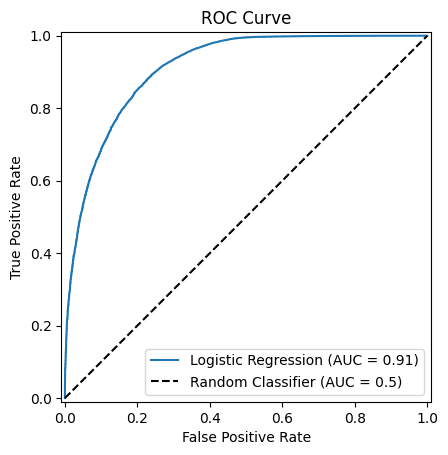

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay.from_estimator(
    logistic_model, X_test_processed, y_test, name='Logistic Regression'
)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.show()